<div dir="rtl">
<font size="4">
<h1><strong>Exercise on classifying rock, paper, scissors images using convolutional neural networks (CNN)</strong></h1>
<h2><strong>Introduction</strong></h2>
<font size="4"> In this exercise, you will design and implement a deep learning model based on convolutional neural networks (CNNs) using a set of real-world images of hand gestures from the <strong>rock, paper, scissors</strong> game. The goal of this project is to accurately classify images into one of three classes: <strong>Rock</strong>, <strong>Paper</strong>, or <strong>Scissors</strong>. This exercise will help you to improve your skills in the fields of <strong>machine vision, deep learning, and image data analysis</strong>. </font>
<h2><strong>Dataset Description</strong></h2>
<font size="4"> The dataset contains <strong>2188</strong> color images in the following three classes: <ul>
<li><strong>Paper</strong></li>
<li><strong>Rock</strong></li>
<li><strong>Scissors</strong></li>
</ul>
The images are 300x200 pixels in size and have 3 color channels (RGB).
These images are divided into three parts:
<ul>
<li>Three images from the entire dataset for testing and 2185 divided into these</li>
<li><strong>1748 images</strong> for training the model</li>
<li><strong>437 images</strong> for model validation</li>
</ul>
</font>
<h2><strong>Your task in this exercise</strong></h2>
<font size="4">
<li>✅ <strong>Data preparation:</strong> Read images, resize to the same dimensions, convert labels to
one-hot encoding and split data into train/validation.</li>
<li>✅ <strong>Data Augmentation:</strong> Implement changes such as rotation, zooming,
inversion, etc. to increase diversity and prevent overfitting.</li>
<li>✅ <strong>Model construction:</strong> Design a CNN model including layers Convolution, MaxPooling, Dropout, Flatten and
Dense and choosing the appropriate activation function for Conv and Output layers.

<li>✅ <strong>Model training:</strong> Using the appropriate loss function, optimizers and tracking Accuracy during
training.

<li>✅ <strong>Model evaluation:</strong> Plotting accuracy and loss graphs, analyzing performance on validation data, and examining
predicted samples.

</font>
<font size="4"> <strong>Ultimate goal:</strong> Developing an accurate and reliable model for <strong>automatic hand movement recognition in
images</strong>, with applicability in interactive games, machine vision systems and human-machine interaction.
</font>
</font>
</div>

<br>
<div dir='rtl'>
<font size=4>
<h2>Dataset</h2>
<li>This dataset is designed to classify images into three different classes: paper, rock, and scissors.
Each of these classes is located in separate folders, and you can find images for each class in the same folder.
</li>
<li>To access this dataset, you can use the following link:
<br>
<a href="https://drive.google.com/drive/folders/1J2dwHvxonbJH18p68x0fCZdueo7l0ecV" target="_blank">Dataset Link</a>
</li>
<li>To use the dataset in Google Colab, you need to place a shortcut of this folder in "MyDrive" of your Google Drive account.
After this, you should be able to find the dataset in the following path:
</li>
<code>/content/drive/MyDrive/rps/rps_dataset</code>
<li>If everything went well, you should have full access to the images for each class and be able to use them to train the model.</li>
</font>
</div>
<br><br><br>

<br><br>
<div dir='rtl'>
<font size=4>
<li>Import the required libraries</li>
</font>

In [2]:
# TODO: Import required libraries
import os  # Import the os module for interacting with the operating system

<br><br>
<div dir='rtl'>
<font size=4>
<li>This code defines the main path of the dataset and the subfolders for the three classes paper, rock, and scissors so that the images of each class can be accessed separately.
You don't need to change this code, just put the address of the dataset folder, which is the <code>rps_dataset</code> folder, in the <code>BASE_DIR</code> variable.
Also, the dataset link is as follows:
<a href="https://drive.google.com/drive/folders/1J2dwHvxonbJH18p68x0fCZdueo7l0ecV" target="_blank">Dataset Link</a>
You should put a shortcut of this folder in MyDrive of your Google Drive account so that you can easily access it.
<br><br>
If all steps were done correctly, you should have a link similar to the following in your Google Drive folders:
<code>/content/drive/MyDrive/rps/rps_dataset</code> or similar folders.
</li>
</font>
</div>

In [ ]:
# TODO: Connect to Google Drive
from google.colab import drive  # Import the drive module from google.colab package
drive.mount('/content/drive')  # Mount Google Drive to the specified directory path
# If you want to process from the club environment, run this cell, otherwise there is no need to run this cell.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# The directories given in the entire project are relative to the folder structure of this project, which may change depending on the need.
# TODO: Set the dataset address in the specified variable and run the cell.
BASE_DIR = '../rps_dataset' # Set the dataset path address and run the cell
PAPER_DIR = os.path.join(BASE_DIR, 'paper/')  # Create full path to paper directory
ROCK_DIR = os.path.join(BASE_DIR, 'rock/')  # Create full path to rock directory
SCISSORS_DIR = os.path.join(BASE_DIR, 'scissors/')  # Create full path to scissors directory

<br><br>
<div dir='rtl'>
<font size=4>
<li>
This dataset contains three classes Rock, Paper and Scissors which are placed in separate folders. Indicate the number of images in each class (folder) in the output.
</li>
</font>

In [5]:
# TODO: Display the number of images for each class in the output.

num_paper = len(os.listdir(PAPER_DIR))  # Count number of files in paper directory
num_rock = len(os.listdir(ROCK_DIR))  # Count number of files in rock directory
num_scissors = len(os.listdir(SCISSORS_DIR))  # Count number of files in scissors directory


print(f"Print number of paper images: {num_paper}")  
print(f"Print number of rock images: {num_rock}")  
print(f"Print number of scissors images: {num_scissors}") 

Print number of paper images: 711
Print number of rock images: 725
Print number of scissors images: 749


<br><br>
<div dir='rtl'>
<font size=4>
<li>
Complete the following function to output two random images from each class.
</li>
</font>

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting and visualization
import random  # Import random for generating random numbers/selections
import cv2  # Import OpenCV for image processing and computer vision tasks

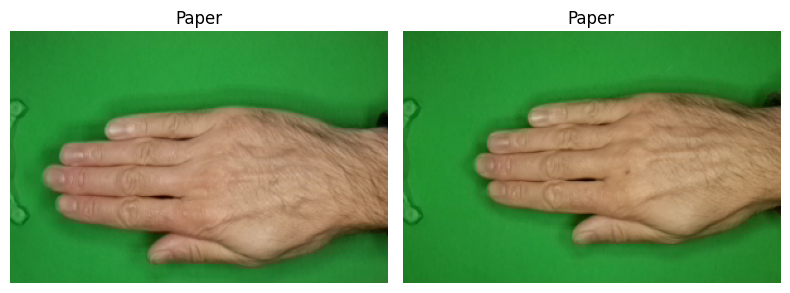

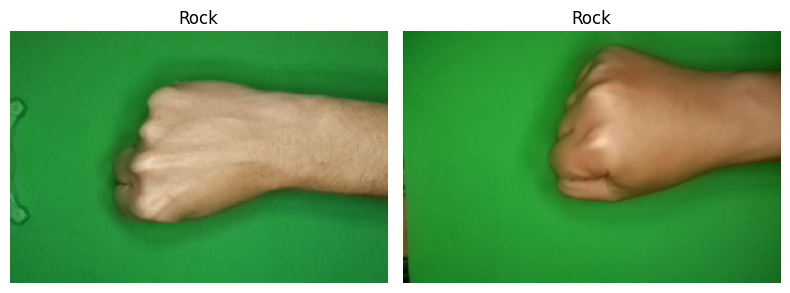

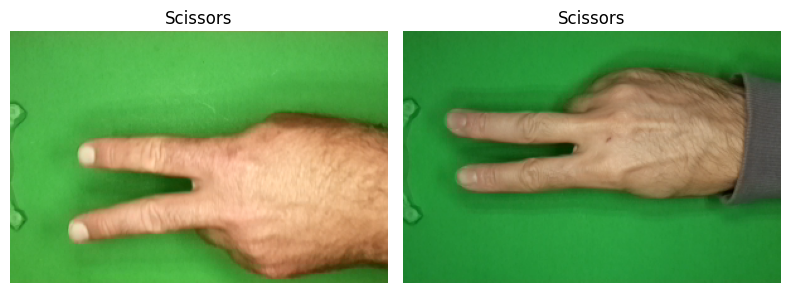

In [ ]:
# TODO: Complete the function for displaying random images.
def visualize_two_sample_images(directory, title="Sample Images"):
    """
    Loads and displays two random images from the specified path.

    Parameters:
    directory (str): Path to the folder containing the images.
    title (str): Title displayed above each image. (Default: "Sample Images")
    """
    plt.figure(figsize=(8,4))  # Create a figure with specified size

    random_images=random.choices(os.listdir(directory), k=2)  # Select 2 random images from directory

    for i,image_name in enumerate(random_images):  # Iterate through selected images

        image_path = os.path.join(directory, image_name)  # Create full image path
        image = cv2.imread(image_path)  # Read image using OpenCV
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB color format

        plt.subplot(1, 2,i + 1)  # Create subplot for current image
        plt.imshow(image)  # Display the image
        plt.title(title)  # Set title for the subplot
        plt.axis('off')  # Turn off axis labels

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the figure

visualize_two_sample_images(PAPER_DIR, title="Paper")  # Display random paper images
visualize_two_sample_images(ROCK_DIR, title="Rock")  # Display random rock images
visualize_two_sample_images(SCISSORS_DIR, title="Scissors")  # Display random scissors images

<br><br>
<div dir='rtl'>
<h1>
<li>
Image Preprocessing
</li>
<h1>
<font size=4>
<li>
In this section, you need to load images from the data path and split them into two sets: training and validation.
Use the image_dataset_from_directory function to automatically convert the images into tensors that can be used in the model.
Note that you need to specify the size of the images and the size of each batch, as well as the split of 80% for training and 20% for validation.
</li>
</font>

<br>
<div dir='rtl'>
<font size=4> The following resources are for further reading on the method mentioned.
</div>

* [Load & Preprocess Images | Tensorflow](https://www.tensorflow.org/tutorials/load_data/images)
* [image_dataset_from_directory | Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)
* [How to Use](https://datascience.stackexchange.com/questions/87469/how-to-load-all-images-using-image-dataset-from-directory-function)

<br><br>

In [ ]:
import tensorflow as tf  # Import TensorFlow library for deep learning and neural networks

In [ ]:
# TODO: Specify image size and batch size (number of images in each training batch)
IMG_SIZE = (96,96)# TODO  # Set image dimensions to 96x96 pixels
BATCH_SIZE = 32 # TODO  # Set batch size to 32 images per batch



# TODO: Load training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  BASE_DIR,  # Use the base directory path
  validation_split=0.2,  # Split 20% of data for validation
  subset="training",  # Select training subset
  seed=42,  # Set random seed for reproducibility
  image_size=IMG_SIZE,  # Resize images to specified dimensions
  batch_size=BATCH_SIZE)  # Use specified batch size

# TODO: Load validation data

val_ds = tf.keras.utils.image_dataset_from_directory(
  BASE_DIR,  # Use the base directory path
  validation_split=0.2,  # Split 20% of data for validation
  subset="validation",  # Select validation subset
  seed=42,  # Set random seed for reproducibility (same as training)
  image_size=IMG_SIZE,  # Resize images to specified dimensions
  batch_size=BATCH_SIZE)  # Use specified batch size

Found 2185 files belonging to 3 classes.
Using 1748 files for training.
Found 2185 files belonging to 3 classes.
Using 437 files for validation.


<br><br>
<div dir='rtl'>
<font size=4>
<li>
Show the class names from the train_ds dataset in the output.
</li>
</font>
<br><br>
<div dir='rtl'>
<font size=4>
<li>
Then show the batch size and labels in the output.
</li>
</font>

In [ ]:
# TODO: Display batch size and labels in the output.

for images, labels in train_ds.take(1):  # Take one batch from the training dataset
  # Display the dimensions of the image tensor
  print("Shape of images batch:", images.shape)

  # Display batch size
  # The first number in the image tensor dimensions is the batch size
  print("Batch size:", images.shape[0])

  # Display the label tensor for this batch
  print("Labels for this batch:", labels.numpy())

# For reference, also print the class names
class_names = train_ds.class_names  # Get class names from the dataset
print("Class names:", class_names)  # Print the class names

Shape of images batch: (32, 96, 96, 3)
Batch size: 32
Labels for this batch: [0 0 2 2 2 0 0 1 0 1 1 1 0 2 2 1 1 2 0 2 2 2 0 0 1 1 2 1 1 0 0 1]
Class names: ['paper', 'rock', 'scissors']


<br><br>
<div dir='rtl'>
<font size=4>
<li>
At this stage, you need to prepare the training and validation data for optimal model training.
To do this:
<li> Use .cache() to cache the data in memory so that it can be read faster at each epoch.</li>
<li> Use .shuffle() to vary the order of the training data so that the model does not overfit.</li>
<li> Use .prefetch() to load the data asynchronously to increase CPU/GPU efficiency.</li>
</li>
</font>
</div>
<br><br>

In [ ]:
# TODO: Cache data in memory for faster training (only if sufficient RAM is available)

AUTOTUNE = tf.data.AUTOTUNE  # Let TensorFlow automatically tune the prefetch buffer size

# Optimize training dataset preparation
train_ds = train_ds.cache()  # Cache the dataset in memory for faster access
train_ds = train_ds.shuffle(buffer_size=2185)  # Shuffle data with specified buffer size
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)  # Prefetch batches for better performance

# Optimize validation dataset preparation
# Note: Validation dataset doesn't need shuffling
val_ds = val_ds.cache()  # Cache the validation dataset in memory
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)  # Prefetch validation batches automatically

<br><br>
<div dir='rtl'>
<font size=4>
<li>
In this section, you will design a Data Augmentation layer that randomly rotates and mirrors images, then displays a number of augmented images for visual inspection.
The goal of this step is to increase the diversity of the training data to improve the generalizability of the model.
</li>
</font>

<br>
<div dir='rtl'>
<font size=4> The following resources are for further reading on the method mentioned.
</div>

* [Data Augmentation | Tensorflow](https://www.tensorflow.org/tutorials/images/data_augmentation)
* [Data Augmentation | Example](https://pyimagesearch.com/2021/06/28/data-augmentation-with-tf-data-and-tensorflow/)
<br>
<br>

In [145]:
import tensorflow as tf

In [ ]:
# TODO: Data augmentation
# Create data augmentation layer
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal_and_vertical"), # Both horizontal and vertical flipping
    tf.keras.layers.RandomRotation(0.5), # Rotation factor up to 180 degrees (0.5 * 360 = 180)
  ],
  name="data_augmentation"  # Name the augmentation layer
)

<br><br>
<div dir='rtl'>
<font size=4>
<li>
This method takes a batch of images from the dataset, applies an augmentation layer to them, and displays a number of images in the form of an image grid. This is done to check the performance of the augmentation layer and ensure that it is applied correctly to the images. Complete the following method.
</li>
</font>
<br>

In [ ]:
# TODO: Display augmented data
def visualize_augmented_images(dataset, augmentation_layer, num_samples=9):
    """
    Display a number of augmented images from a training dataset.

    This function samples from a batch of images in the dataset, applies the data augmentation layer
    to the images, and then displays several images in a grid format in the output.

    Parameters:
    ----------
    dataset : tf.data.Dataset
        Dataset containing original images (e.g., training dataset).

    augmentation_layer : tf.keras.Sequential or tf.keras.Layer
        Data augmentation layer that includes operations like rotation, flipping, or other random transformations.

    num_samples : int, default=9
        Number of images to be displayed. This number should not exceed the number of images in the batch.

    Returns:
    -------
    No value is returned, but a visual plot of the augmented images is displayed.
    """
    # 1. Take one batch from the dataset for sampling
    for images, labels in dataset.take(1):


        plt.figure(figsize=(10, 10))  # Create a figure with specified size


        for i in range(num_samples):  # Iterate through number of samples

            plt.subplot(3, 3, i + 1)  # Create subplot in 3x3 grid


            augmented_image = augmentation_layer(images[i][tf.newaxis, ...])  # Apply augmentation to single image


            plt.imshow(augmented_image[0].numpy().astype("uint8"))  # Display augmented image



            plt.axis("off")  # Turn off axis

        plt.show()  # Display the figure


        break  # Exit after processing one batch

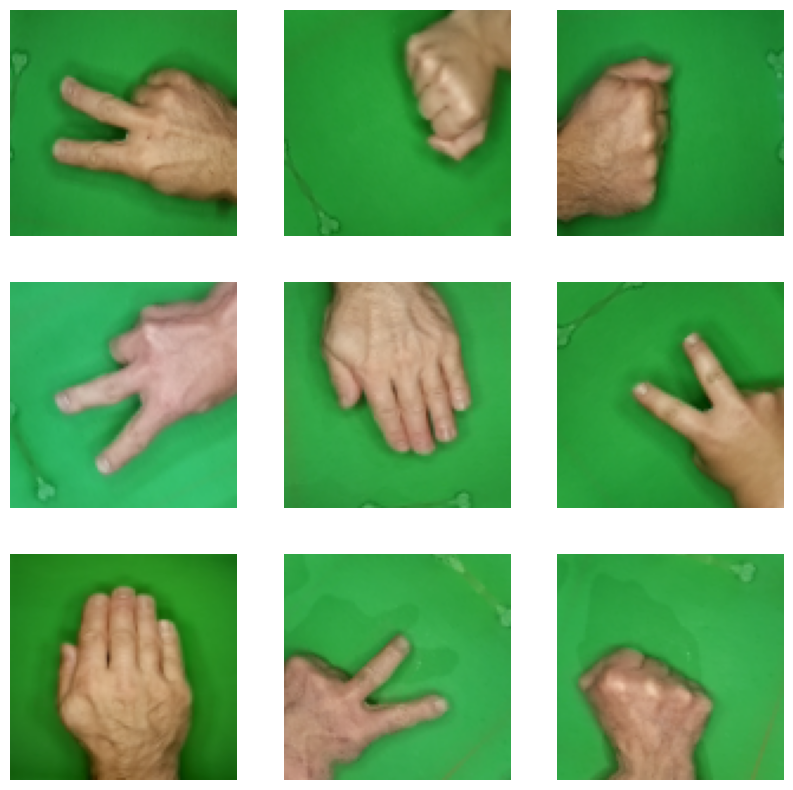

In [148]:
visualize_augmented_images(train_ds, data_augmentation, num_samples=9)

<br>
<div dir='rtl'>
<font size=4>
<li>
This part of the code requires you to perform preprocessing on the image data before entering it into the model.
The main goal here is to normalize the pixel values, so that the original values, which are in the range [0, 255], are converted to the range [0.0, 1.0].
A function is defined that converts each image from int to float and then divides it by 255 to normalize it. Complete this function and then apply it to the entire training and validation data using the map method.
</li>
</font>
<br><br>

In [ ]:
# Define normalization function
def normalize_img(image, label):
    """Normalize pixel values to the range [0, 1]"""
    image = tf.cast(image, tf.float32)  # Convert to float32
    image = image / 255.0  # Divide by 255 for normalization
    return image, label

# Apply normalization function to training and validation data
train_ds = train_ds.map(normalize_img, num_parallel_calls=AUTOTUNE)  # Normalize training dataset
val_ds = val_ds.map(normalize_img, num_parallel_calls=AUTOTUNE)  # Normalize validation dataset

<br><br>
<div dir='rtl'>
<h1><li>Designing the Neural Network and Training the Model</li></h1>
<font size=4>
<li>
In this step, you need to design a Convolutional Neural Network (CNN) model that includes feature extraction, dimensionality reduction, and fully connected layers to classify images into three different categories. Also, the model should be compiled and ready to be trained.
</li>
</font>
<br>

In [ ]:
from tensorflow.keras.models import Sequential, load_model  # Import Sequential model and load_model function
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout  # Import various layer types

In [ ]:
# TODO: Build Convolutional Neural Network (CNN) model for image classification
model = Sequential([
        tf.keras.Input(shape=(96, 96, 3)),  # Define input shape for the model
        data_augmentation,  # Apply data augmentation layer to input images
        Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),  # First convolutional layer with 32 filters

        BatchNormalization(),  # Batch normalization for stabilizing learning
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # Max pooling to reduce spatial dimensions

        Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),  # Second conv layer with 256 filters
        BatchNormalization(),  # Batch normalization
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # Max pooling

        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),  # Third conv layer with 384 filters
        BatchNormalization(),  # Batch normalization

        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),  # Fourth conv layer with 384 filters
        BatchNormalization(),  # Batch normalization

        Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),  # Fifth conv layer with 256 filters
        BatchNormalization(),  # Batch normalization
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # Max pooling

        Flatten(),  # Flatten 3D features to 1D for dense layers

        Dense(256, activation='relu'),  # First fully connected layer with 256 units
        Dropout(0.2),  # Dropout regularization with 20% rate

        Dense(256, activation='relu'),  # Second fully connected layer with 256 units
        Dropout(0.2),  # Dropout regularization with 20% rate

        Dense(3, activation='softmax')  # Output layer with 3 units (for 3 classes) and softmax activation
])

model.summary()  # Display model architecture summary

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 96, 96, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 48, 48, 256)    │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 24, 24, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 24, 24, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 24, 24, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 24, 24, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 24, 24, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,681,731 (48.38 MB)

 Trainable params: 12,679,107 (48.37 MB)

 Non-trainable params: 2,624 (10.25 KB)

<br><br>
<div dir='rtl'>
<font size=4>
<li> Compile the model and then train it.
</div>
<br>

In [ ]:
# TODO: Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

<br><br>
<div dir='rtl'>
  <font size=4>
    <li>
        مدل را آموزش دهید.
</font>

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau  # Import training callbacks

In [ ]:
checkpoint = ModelCheckpoint(filepath="../model/best_model_epoch.h5", monitor="val_accuracy",
                             save_best_only=True, mode="max", verbose=1)  # Save best model based on validation accuracy



reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',  # Monitor validation accuracy
                              factor=0.5,  # Reduce learning rate by half
                              patience=2,  # Wait for 2 epochs without improvement
                              min_lr=1e-6,  # Minimum learning rate
                              verbose=1)  # Print reduction messages

early_stopping = EarlyStopping(monitor="val_accuracy",  # Monitor validation accuracy
                               patience=5,  # Wait for 5 epochs without improvement
                               restore_best_weights=True, verbose=1)  # Restore best weights when stopping

history = model.fit(train_ds, epochs=20,  # Train for maximum 20 epochs
                    validation_data=val_ds,  # Use validation data for evaluation
                    callbacks=[checkpoint, early_stopping,reduce_lr])  # Apply all callbacks during training

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4384 - loss: 5.4138
Epoch 1: val_accuracy improved from -inf to 0.35011, saving model to best_model_epoch.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - accuracy: 0.4398 - loss: 5.3847 - val_accuracy: 0.3501 - val_loss: 4.0477 - learning_rate: 0.0010
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6973 - loss: 1.3694
Epoch 2: val_accuracy did not improve from 0.35011
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.6978 - loss: 1.3672 - val_accuracy: 0.3066 - val_loss: 9.1612 - learning_rate: 0.0010
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7681 - loss: 1.1819
Epoch 3: val_accuracy improved from 0.35011 to 0.39130, saving model to best_model_epoch.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.7682 - loss: 1.1801 - val_accuracy: 0.3913 - val_loss: 6.6396 - learning_rate: 0.0010
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8308 - loss: 0.7440
Epoch 4: val_accuracy did not improve from 0.39130
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.8308 - loss: 0.7438 - val_accuracy: 0.3753 - val_loss: 9.3078 - learning_rate: 0.0010
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8610 - loss: 0.4792
Epoch 5: val_accuracy improved from 0.39130 to 0.51945, saving model to best_model_epoch.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.8608 - loss: 0.4811 - val_accuracy: 0.5195 - val_loss: 6.3350 - learning_rate: 0.0010
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8871 - loss: 0.4682
Epoch 6: val_accuracy did not improve from 0.51945
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.8872 - loss: 0.4671 - val_accuracy: 0.4233 - val_loss: 5.3444 - learning_rate: 0.0010
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9122 - loss: 0.3681
Epoch 7: val_accuracy did not improve from 0.51945
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9120 - loss: 0.3682 - val_accuracy: 0.3753 - val_loss: 8.8385 - learning_rate: 0.0010
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9016 - loss: 0.3620
Epoch 8: val_accuracy improved from 0.51945 to 0.79405, saving model to best_model_epoch.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9015 - loss: 0.3620 - val_accuracy: 0.7941 - val_loss: 0.7990 - learning_rate: 0.0010
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9214 - loss: 0.3025
Epoch 9: val_accuracy did not improve from 0.79405
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9214 - loss: 0.3025 - val_accuracy: 0.5606 - val_loss: 2.3491 - learning_rate: 0.0010
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9264 - loss: 0.2714
Epoch 10: val_accuracy did not improve from 0.79405
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9265 - loss: 0.2711 - val_accuracy: 0.6979 - val_loss: 2.6193 - learning_rate: 0.0010
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9558 - loss: 0.1771
Epoch 11: val_accuracy improved from 0.79405 to 0.80320, saving model to best_model_epoch.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9556 - loss: 0.1777 - val_accuracy: 0.8032 - val_loss: 1.1721 - learning_rate: 0.0010
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9369 - loss: 0.2563
Epoch 12: val_accuracy improved from 0.80320 to 0.92906, saving model to best_model_epoch.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9369 - loss: 0.2564 - val_accuracy: 0.9291 - val_loss: 0.2058 - learning_rate: 0.0010
Epoch 13/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9546 - loss: 0.1915
Epoch 13: val_accuracy improved from 0.92906 to 0.96568, saving model to best_model_epoch.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9546 - loss: 0.1912 - val_accuracy: 0.9657 - val_loss: 0.1271 - learning_rate: 0.0010
Epoch 14/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9447 - loss: 0.1901
Epoch 14: val_accuracy did not improve from 0.96568
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9447 - loss: 0.1900 - val_accuracy: 0.7346 - val_loss: 0.9843 - learning_rate: 0.0010
Epoch 15/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9612 - loss: 0.1740
Epoch 15: val_accuracy did not improve from 0.96568
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9613 - loss: 0.1735 - val_accuracy: 0.6934 - val_loss: 2.9100 - learning_rate: 0.0010
Epoch 16/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9685 - loss: 0.1343
Epoch 16: val_accuracy did not improve from 0.96568

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9685 - loss: 0.1345 - val_accura

55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9863 - loss: 0.0652 - val_accuracy: 0.9817 - val_loss: 0.0530 - learning_rate: 5.0000e-04
Epoch 19/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9907 - loss: 0.0345
Epoch 19: val_accuracy improved from 0.98169 to 0.99085, saving model to best_model_epoch.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.9906 - loss: 0.0346 - val_accuracy: 0.9908 - val_loss: 0.0229 - learning_rate: 5.0000e-04
Epoch 20/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9937 - loss: 0.0222
Epoch 20: val_accuracy did not improve from 0.99085
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9936 - loss: 0.0223 - val_accuracy: 0.9748 - val_loss: 0.0731 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 19.


<br><br>
<div dir='rtl'>
  <font size=4>
    <li>
        متد زیرا کامل کنید و پلات accuracy و loss را نشان دهد.
</font>
<br><br>

In [ ]:
def plot_training_history(history):
    """
    Plot accuracy and loss graphs for training and validation data.

    This function creates two plots:
    1. Accuracy plot showing model accuracy during training and validation.
    2. Loss plot showing model loss during training and validation.

    Parameters:
    - history: Object containing model training history information. This object is typically returned from the Keras `fit()` method and contains accuracy and loss values for training and validation for each epoch.

    The generated plots will be as follows:
    - First plot displays training and validation accuracy.
    - Second plot displays training and validation loss.

    Output:
    - Displays accuracy and loss plots.
    """

    acc = history.history.get('accuracy')  # Get training accuracy values
    val_acc = history.history.get('val_accuracy')  # Get validation accuracy values
    loss = history.history.get('loss')  # Get training loss values
    val_loss = history.history.get('val_loss')  # Get validation loss values

    epochs = range(1, len(acc) + 1)  # Create epoch range for x-axis

    plt.figure(figsize=(12, 5))  # Create figure with specified size

    # Accuracy plot
    plt.subplot(1, 2, 1)  # Create first subplot
    plt.plot(epochs, acc, 'b-', label='Training accuracy')  # Plot training accuracy
    plt.plot(epochs, val_acc, 'r-', label='Accuracy of validation')  # Plot validation accuracy
    plt.title('Training accuracy and validation') # 'Training and validation accuracy'
    plt.xlabel('Epoch')  # Set x-axis label
    plt.ylabel('Accuracy')  # Set y-axis label
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid

    # Loss plot
    plt.subplot(1, 2, 2)  # Create second subplot
    plt.plot(epochs, loss, 'b-', label='Teaching error')  # Plot training loss
    plt.plot(epochs, val_loss, 'r-', label='Validation error')  # Plot validation loss
    plt.title('Training and validation error') #'Training and validation loss'
    plt.xlabel('Epoch')  # Set x-axis label
    plt.ylabel('Loss')  # Set y-axis label
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid

    plt.tight_layout()  # Adjust layout
    plt.show()  # Display plots

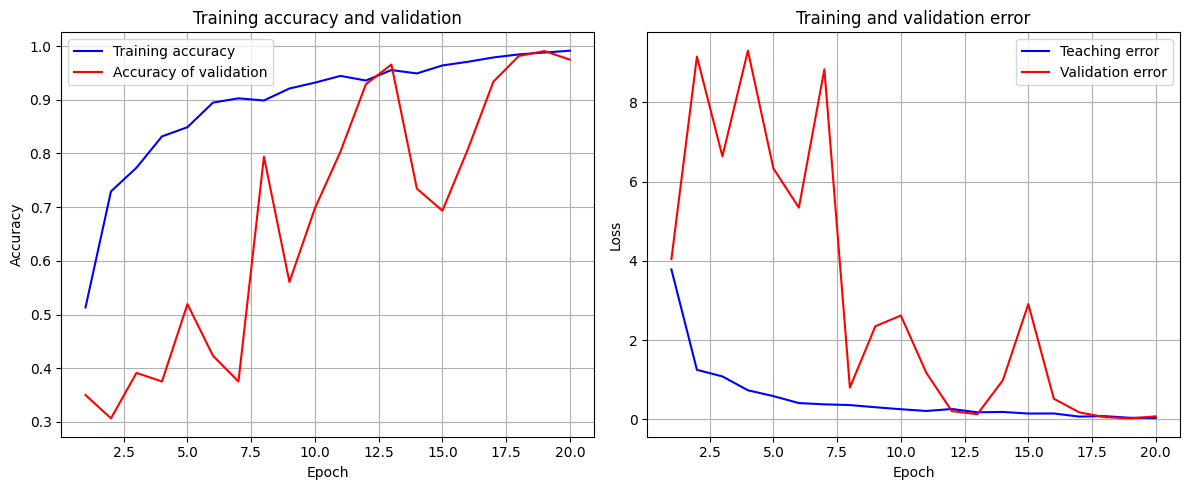

In [156]:
plot_training_history(history)

<br><br>
<div dir='rtl'>
<font size=4>
<li>
At this point, you should be able to use the model you trained to predict the class of a new image. The goal of this section is to show the performance of the model on the input image and show the predicted class along with the model's confidence level. Complete the following function to take an image and make a prediction on it.
</font>
<br><br>

In [ ]:
from tensorflow.keras.models import load_model  # Import load_model function

# Load model
model = load_model("../model/best_model_epoch.h5")  # Load the saved model from specified file path

In [ ]:
import tensorflow as tf  # Import TensorFlow
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical operations

def predict_image(model, image_path, class_names, img_size=(96, 96)):
    """
    Load and preprocess an image and predict its class.

    This function loads the input image from the specified path, preprocesses it
    (resizing, converting to array, and adding batch dimension) and then makes
    a prediction using the trained model. Finally, it displays the predicted class
    and prediction confidence.

    Parameters:
    - model: Trained neural network model (CNN model in this case).
    - image_path: Path to the input image to be predicted.
    - class_names: List of class names that the model was trained on.
    - img_size: Input image size after resizing to match model input (default: (96, 96)).

    Returns:
    - predicted_class: Predicted class of the image.
    - confidence: Prediction confidence as percentage.

    Plot:
    - The input image is displayed with the predicted class and confidence in the title.
    """
    # Load image and resize it to the required model size
    img = tf.keras.utils.load_img(image_path, target_size=img_size)

    # Convert image to numpy array and normalize pixel values to range [0, 1]
    img_array = tf.keras.utils.img_to_array(img) / 255.0

    # Add a dimension to create a batch of size 1 (preferably use tf.newaxis)
    img_batch = img_array[tf.newaxis, ...]

    # Make prediction with the model
    predictions = model.predict(img_batch)

    # Find the class with highest probability and confidence level
    confidence = np.max(predictions[0]) * 100  # Convert to percentage
    predicted_class = class_names[np.argmax(predictions[0])]  # Get class name

    # Display image and prediction result
    plt.imshow(img)  # Show the image
    plt.title(f'Predicted: {predicted_class}\nConfidence: {confidence:.2f}%')  # Set title with results
    plt.axis('off')  # Turn off axis
    plt.show()  # Display the plot

    return predicted_class, confidence  # Return prediction results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


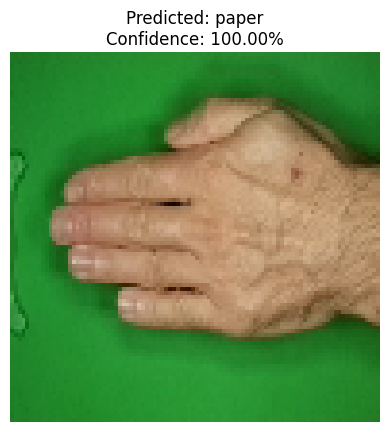

In [ ]:
predicted_class, confidence = predict_image(model, "../rps_dataset/test_samples/paper_test_sample.png", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


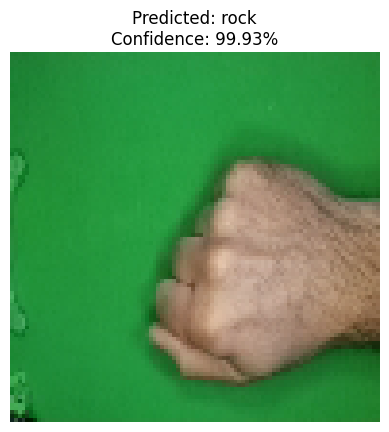

In [ ]:
predicted_class, confidence = predict_image(model, "../rps_dataset/test_samples/rock_test_sample.png", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


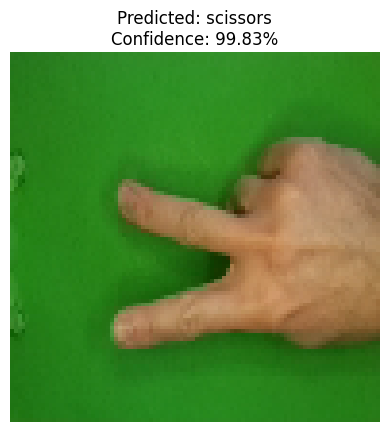

In [ ]:
predicted_class, confidence = predict_image(model, "../rps_dataset/test_samples/scissors_test_sample.png", class_names)